In [1]:
from IPython.core.display import HTML
with open('../style.css') as f:
    css = f.read()
HTML(css)

# Depth First Search

In [2]:
import psutil

The function `search` takes three arguments to solve a *search problem*:
- `start` is the start state of the search problem,
- `goal`is the goal state, and
- `next_states` is a function with signature $\texttt{next_states}:Q \rightarrow 2^Q$, where $Q$ is the set of states.
  For every state $s \in Q$, $\texttt{next_states}(s)$ is the set of states that can be reached from $s$ in one step.
If successful, `search` returns a path from `start` to `goal` that is a solution of the search problem
$$ \langle Q, \texttt{next_states}, \texttt{start}, \texttt{goal} \rangle. $$

In [3]:
def search(start, goal, next_states):
    return dfs(start, goal, next_states, [start], { start })

The function `dfs` takes five arguments to solve a *search problem*
- `state` is a state of the search problem.
   It is assumed that we have already found a path from the `start` state of our search problem 
   that leads to `state`.
- `goal`is the goal state, and
- `next_states` is a function with signature $\texttt{next_states}:Q \rightarrow 2^Q$, where $Q$ is the set of states.
  For every state $s \in Q$, $\texttt{next_states}(s)$ is the set of states that can be reached from $s$ in one step.
- `Path` is a path leading from the `start` state of the search problem to `state`. 
  Therefore, `start = Path[0]`.
- `PathSet` is the set of all nodes occurring in the list `Path`.

The implementation of `dfs` works as follows:
- If `state` is equal to `goal`, our search is successful.  Since by assumption
  the list `Path` is a path connecting the `start` state of our search problem with `state`, 
  `Path` is the solution fo the search problem.
- Otherwise, `next_states(state)` is the set of states that are reachable from `state`
  in one step.  Any of the states `ns` in this set could be the next state on a path
  that leads to `goal`.  Therefore, we try recursively to reach `goal` from
  every state `ns`.  Note that we have to change `Path` to the list
  `Path + [ns]` when we call the procedure `dfs` recursively.  This way, we retain the invariant of
  `dfs` that the list `Path` is a path connecting the start state of our search problem with `state`.
- In order to avoid running in circles we check that the state `ns` is not already a member of the 
  list `Path`.  It would be very inefficient to search in the list `Path`.  Therefore, we search
  in `PathSet` instead because this set contains the same elements as the list `Path`.
- If one of the recursive calls of `dfs` returns a list, this list is a solution to our
  search problem and hence it is returned.  However, if instead the value
  `None` is returned, the `for` loop needs to carry on and test the other
  successors of `state`.

Note that the recursive invocation of `dfs` returns `None` if the end of the
`for` loop is reached and no solution has been returned so far.  

In [4]:
def dfs(state, goal, next_states, Path, PathSet):
    if state == goal:
        return Path
    for ns in next_states(state):
        if ns not in PathSet:
            Path   .append(ns)
            PathSet.add(ns)
            Result = dfs(ns, goal, next_states, Path, PathSet)
            if Result != None:
                return Result    
            Path   .pop()
            PathSet.remove(ns)
    return None

# Display Code

Below, we ensure that we only import `graphviz` if this notebook is not loaded from another notebook.  This works by checking that the variable `file` is not set.

In [5]:
try:
    __file__
except NameError:
    import graphviz as gv

The function $\texttt{toDot}(\texttt{source}, \texttt{Edges}, \texttt{Fringe}, \texttt{Visited})$ takes a graph that is represented by 
its `Edges`, a set of nodes `Fringe`, and set `Visited` of nodes that have already been visited.

In [6]:
def toDot(source, goal, Edges, Path):
    V = set()
    for x, L in Edges.items():
        V.add(x)
        for y in L:
            V.add(y)
    dot = gv.Digraph(node_attr={'shape': 'record', 'style': 'rounded'})
    dot.attr(rankdir='LR')
    for x in V:
        if x in Path and x == goal:
            dot.node(str(x), label=str(x), color='magenta')
        elif x in Path:
            dot.node(str(x), label=str(x), color='red')
        else:
            dot.node(str(x), label=str(x))
    for u in V:
        if Edges.get(u):
            for v in Edges[u]:
                if u in Path and v in Path and Path.index(v) == Path.index(u) + 1:
                    dot.edge(str(u), str(v), color='brown', style='bold') 
                elif u in Path and v in Path and Path.index(v) + 1 == Path.index(u):
                    dot.edge(str(u), str(v), color='blue', style='bold', dir='back')
                else:
                    dot.edge(str(u), str(v), dir='both')
    return dot

# Testing

In [7]:
n = 6

In [8]:
def nextStates(node):
    x, y = node
    if x == 0 and y == 0:
        return { (1, 0), (0, 1) }
    if x == 0 and 0 < y < n-1:
        return { (x+1, y), (x, y+1), (x, y-1) }
    if 0 < x < n-1 and y == 0:
        return { (x+1, y), (x, y+1), (x-1, y) }
    if 0 < x < n-1 and 0 < y < n-1:
        return { (x+1, y), (x, y+1), (x-1, y), (x, y-1) }
    if x == n-1 and y == 0:
        return { (x, y+1), (x-1, y)}
    if x == 0 and y == n-1:
        return { (x, y-1), (x+1, y)}
    if x == n-1 and 0 < y < n-1:
        return { (x, y+1), (x-1, y), (x, y-1) }
    if 0 < x < n-1 and y == n-1:
        return { (x+1, y), (x-1, y), (x, y-1) }
    if x == n-1 and y == n-1:
        return { (x-1, y), (x, y-1) }
    return {}

In [9]:
def remove_back_edge(r, c, NS):
    return [(x,y) for (x,y) in NS if x >= r and y >= c]

In [10]:
def create_edges(n):
    Edges = {}
    for row in range(n):
        for col in range(n):
            if (row, col) != (n-1, n-1):
                Edges[(row, col)] = remove_back_edge(row, col, nextStates((row, col)))
    for k in range(n-1):
        Edges[(k, n-1)] = [(k+1, n-1)]
        Edges[(n-1, k)] = [(n-1, k+1)]
    return Edges

In [11]:
def search_show(start, goal, next_states, Edges):
    Result = dfs_show(start, goal, next_states, [start], Edges)
    display(toDot(start, goal, Edges, Result))

In [12]:
def dfs_show(state, goal, next_states, Path, Edges):
    if state == goal:
        return Path
    for ns in next_states(state):
        if ns not in Path:
            display(toDot(state, goal, Edges, Path))
            Result = dfs_show(ns, goal, next_states, Path + [ns], Edges)
            if Result:
                return Result

In [13]:
def main():
    Edges = create_edges(n)
    search_show((0,0), (n//2,n//2), nextStates, Edges)

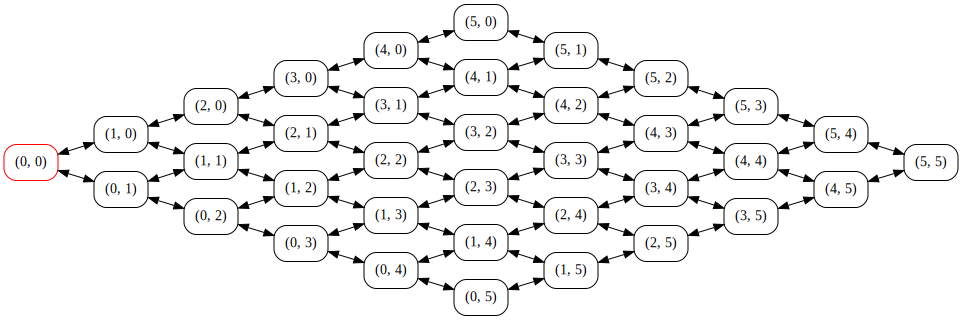

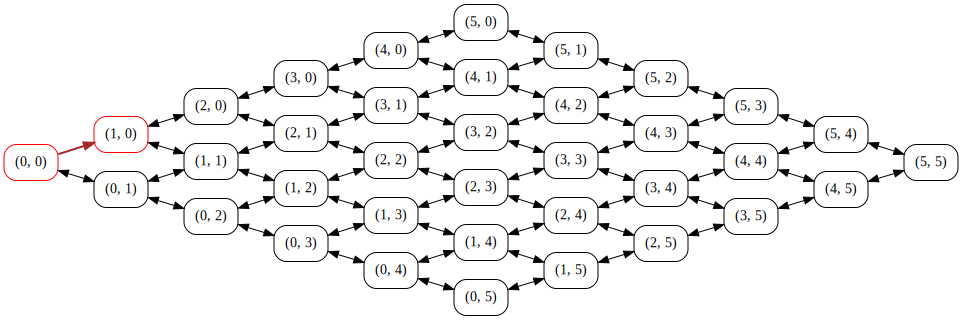

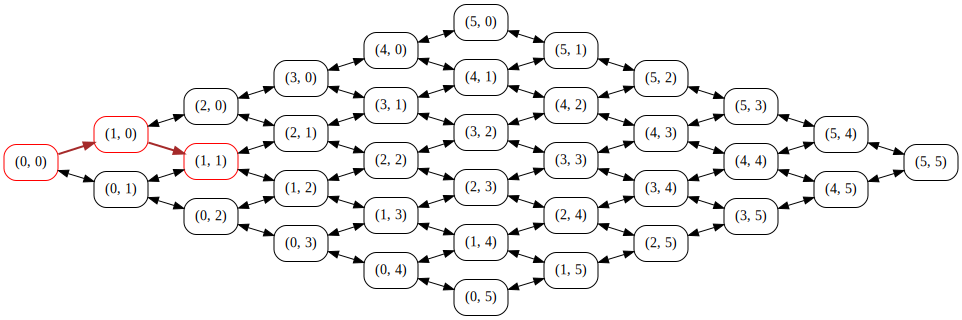

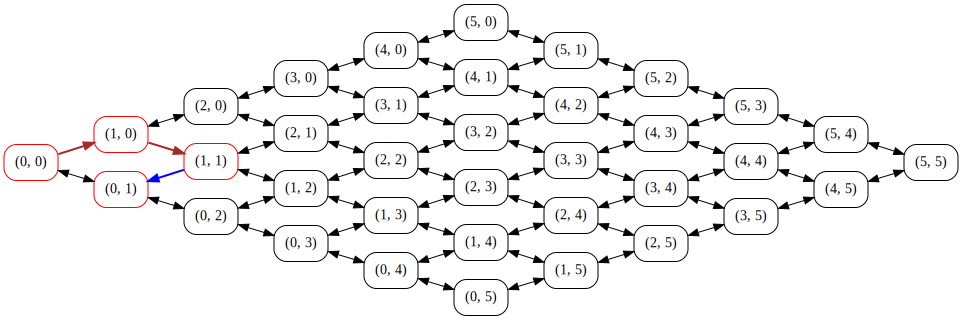

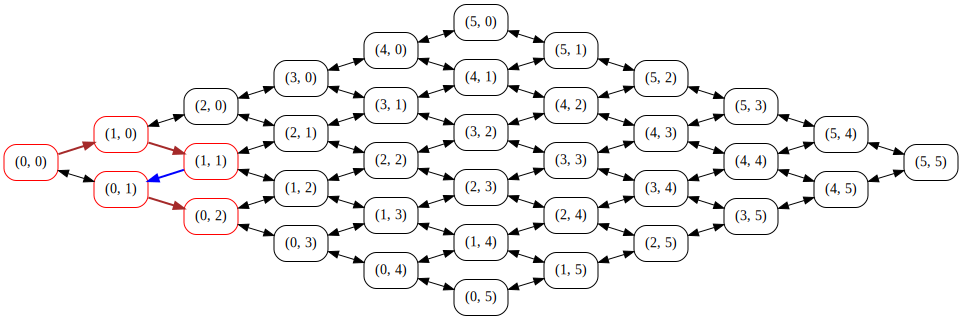

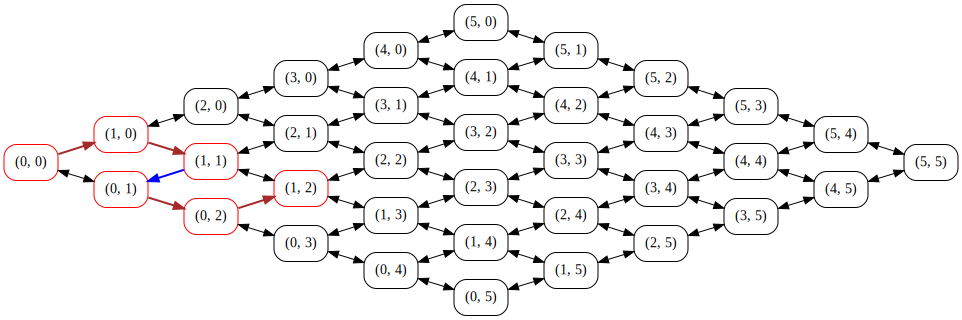

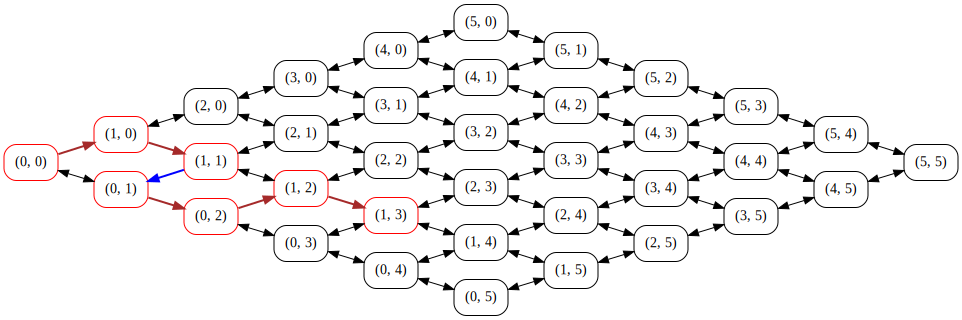

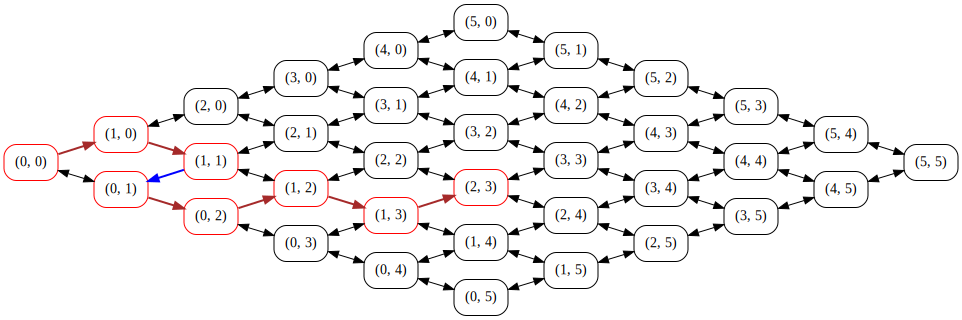

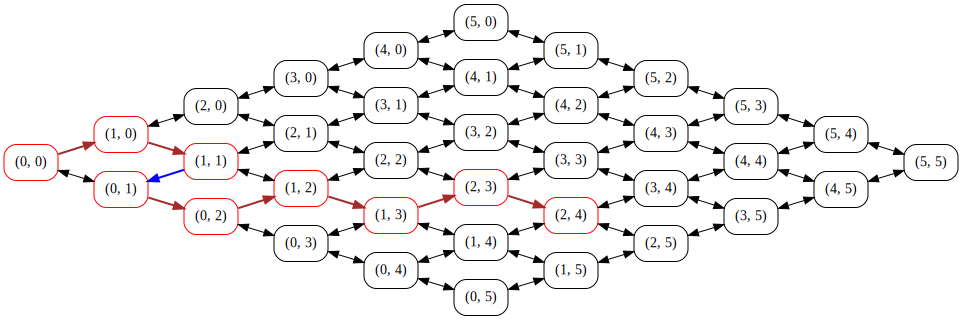

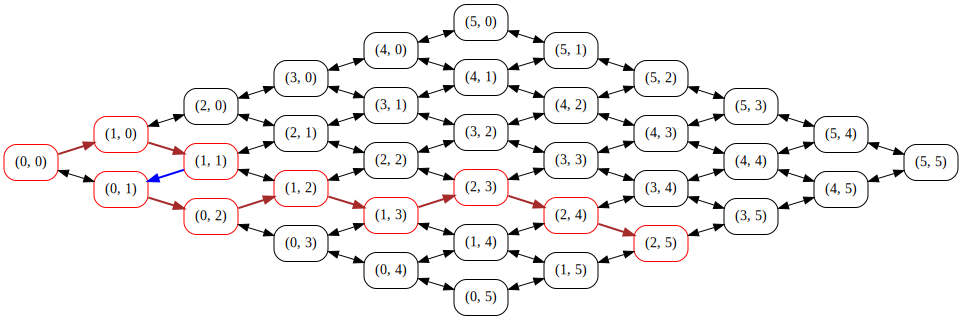

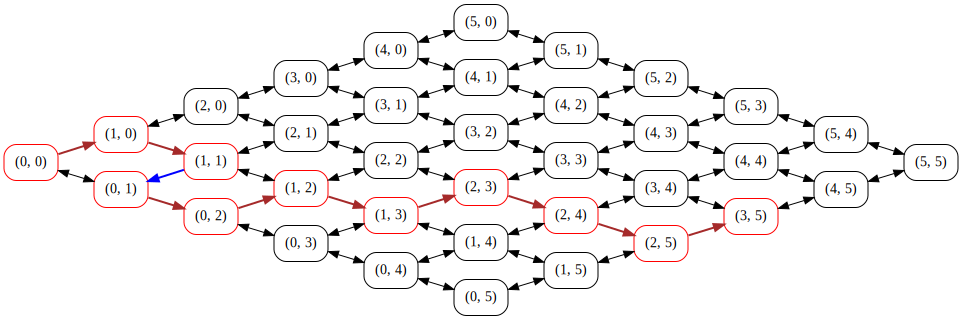

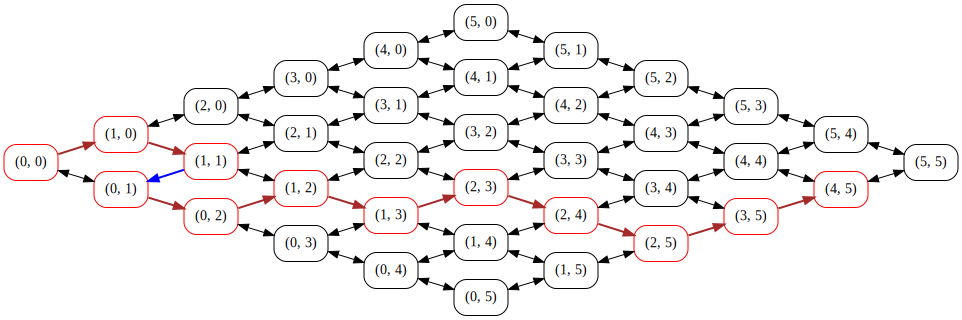

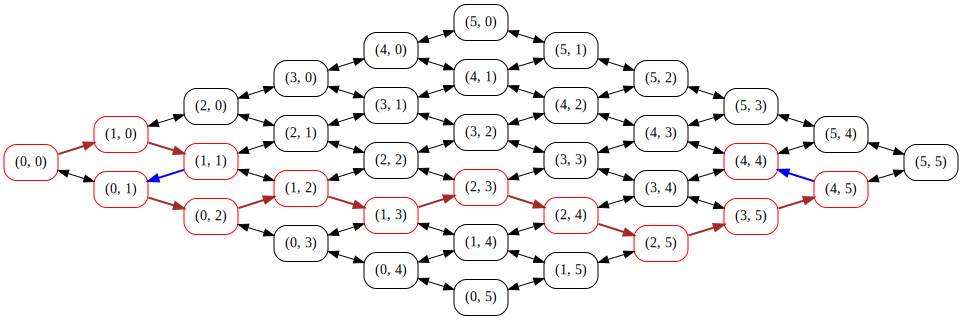

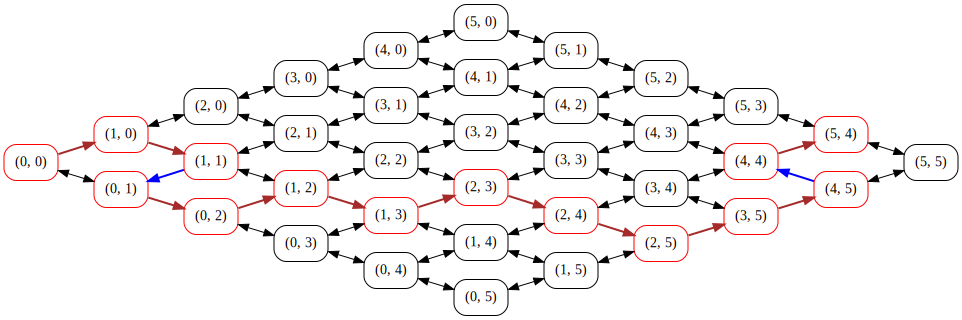

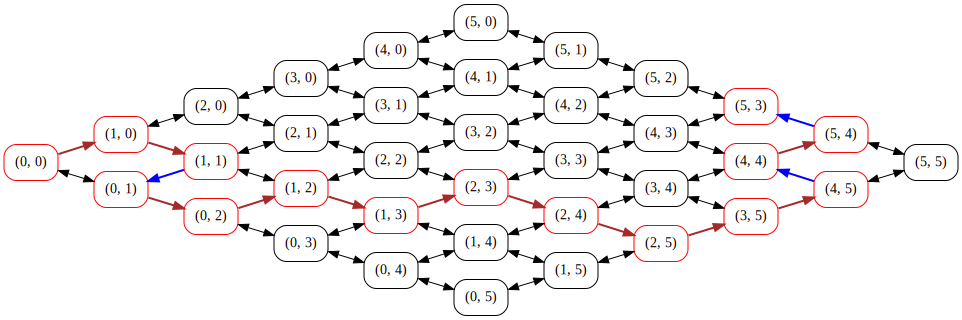

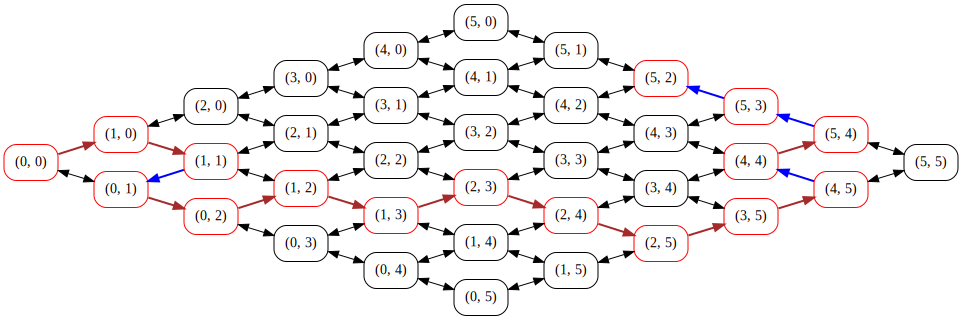

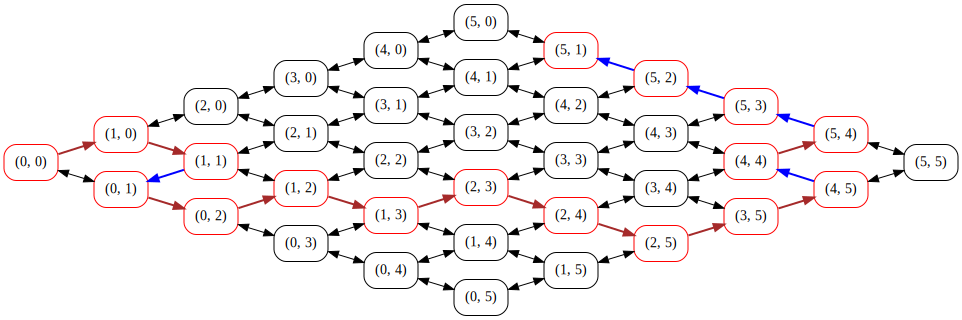

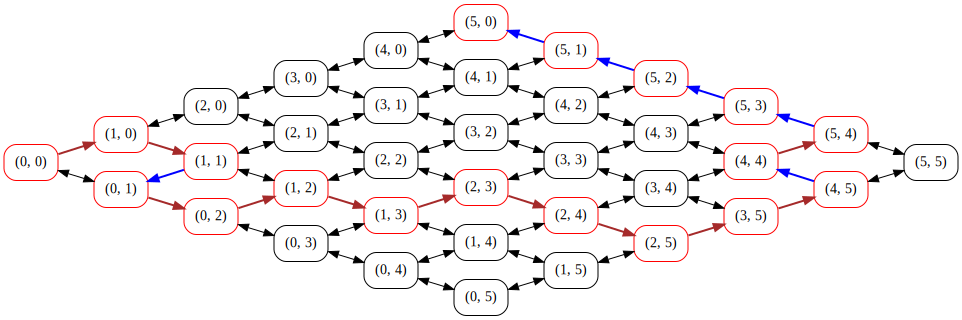

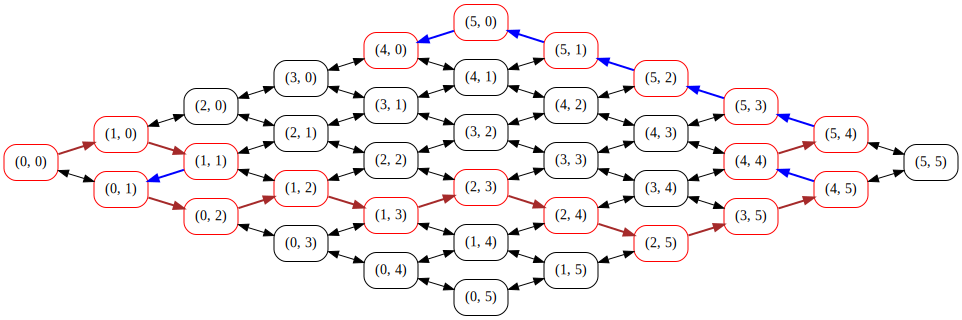

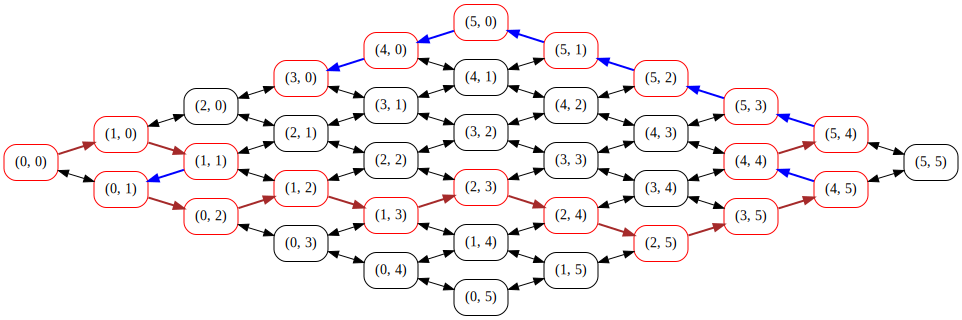

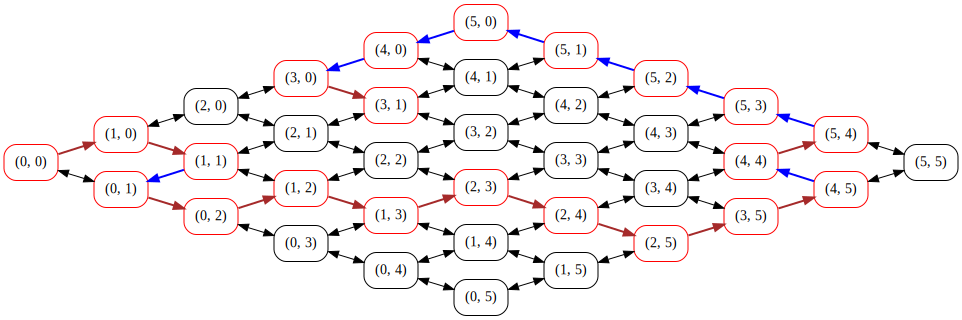

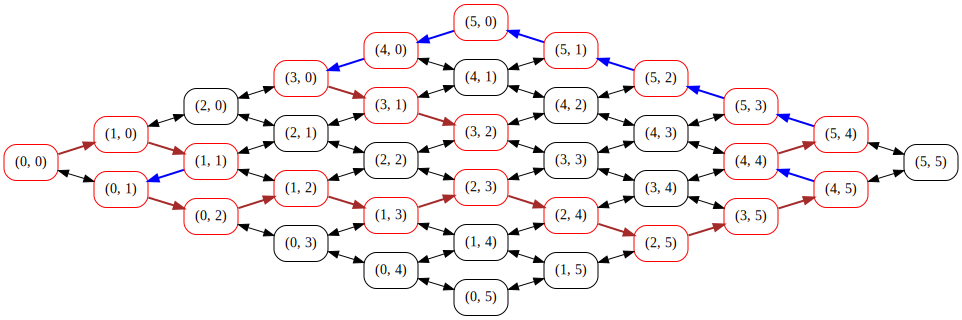

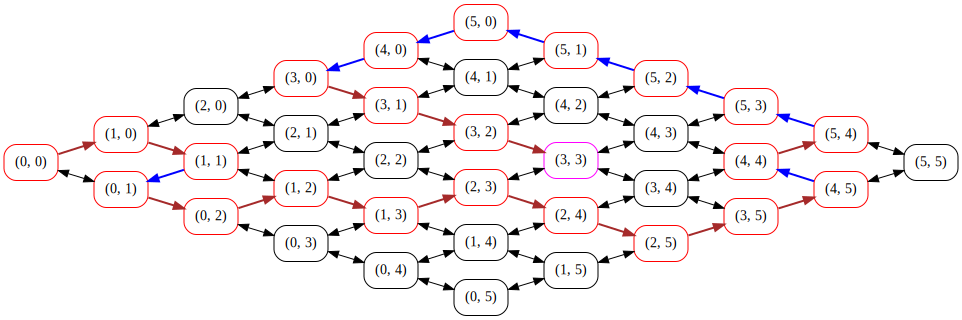

In [14]:
main()

# Solving the Sliding Puzzle

In [15]:
%run Sliding-Puzzle.ipynb

In [16]:
import sys

In [17]:
sys.setrecursionlimit(200000)

In [18]:
%load_ext memory_profiler

In [ ]:
%%time
%memit Path = search(start, goal, next_states)
print(f'Length of path: {len(Path)-1}')

In [ ]:
animation(Path)